In [1]:
marketing_expenditure = [300000, 200000, 400000, 300000, 100000]
units_sold = [60000, 50000, 90000, 80000, 30000]
desired_units_sold = 60000

In [37]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

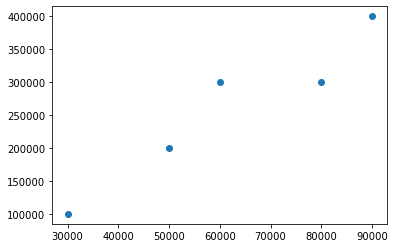

In [29]:
plt.scatter(units_sold,marketing_expenditure)

In [36]:
lm = linear_model.LinearRegression(fit_intercept=False)
lmdata = []
for dat in units_sold:
    lmdata.append([1,dat])
    
mod = lm.fit(lmdata, marketing_expenditure)
mod.predict([[1,60000],[1,0]])[0]

250877.19298245618

In [40]:
df = pd.DataFrame({
    'marketing_expenditure': marketing_expenditure,
    'units_sold': units_sold
})
df

,marketing_expenditure,units_sold
0,300000,60000
1,200000,50000
2,400000,90000
3,300000,80000
4,100000,30000


In [43]:
df1 = df.groupby('marketing_expenditure').mean()
df1

,units_sold
marketing_expenditure,
100000,30000
200000,50000
300000,70000
400000,90000


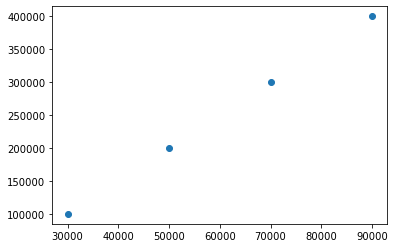

In [49]:
plt.scatter(np.array(df1.iloc[:,0]),np.array(df1.index))

In [50]:
np.array(df1.iloc[:,0])

array([30000, 50000, 70000, 90000], dtype=int64)

In [26]:
slope_data = []
for i in range(len(units_sold)):
    slope_data.append([marketing_expenditure[i],units_sold[i]])
    
slope_data

[[300000, 60000],
 [200000, 50000],
 [400000, 90000],
 [300000, 80000],
 [100000, 30000]]

In [51]:
slopes = []
sorted_data = np.sort(slope_data)
for i in list(range(len(sorted_data)))[1:]:
    xdiff = sorted_data[i,0] - sorted_data[(i-1),0]
    ydiff = sorted_data[i,1] - sorted_data[(i-1),1]
    slopes.append(ydiff/xdiff)
    
slopes
import statistics
statistics.mode(slopes)

10.0

In [52]:
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [60]:
#xx = np.linspace(min(units_sold),max(units_sold), len(units_sold))
#itp = interp1d(units_sold,marketing_expenditure, kind='linear')
#window_size, poly_order = 2, 3
#yy_sg = savgol_filter(itp(xx), window_size, poly_order)
#yy_sg


In [63]:
f = interp1d(units_sold, marketing_expenditure, kind='linear')
f(60000)

array(300000.)

In [79]:
sorted_list = [1, 3, 5, 7]
len([x for x in sorted_list if x < 4])
5//2
list(range(0,10,2))

[0, 2, 4, 6, 8]

### file owners

In [81]:
files = {
        'Input.txt': 'Randy',
        'Code.py': 'Stan',
        'Output.txt': 'Randy'
    }   
len(files)

3

In [130]:
unms = list(set(list(files.values())))
output = {}
ids = list(map(lambda nm: nm == unms[0],list(files.values())))
for nm in unms:
    # make list
    ids = list(map(lambda x: x == nm,list(files.values())))
    tmp = []
    for i in range(len(ids)):
        if ids[i]:
            tmp.append(list(files.keys())[i])
        
    output.update({nm: tmp})
    
output

{'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']}

## data frame munge

In [233]:
id_name_verified = pd.DataFrame([[1, "JohnDoe", True], [2, "AnnFranklin", False]], columns=["Id", "Login", "Verified"])
id_password = np.array([[1, 987340123], [2, 187031122]], np.int32)
df = pd.DataFrame(id_password,columns=['Id',"Password"])
df1 = pd.merge(id_name_verified, df, on=['Id','Id'])
#df1.drop(columns=['Verified'],inplace=True)
df1
id_name_verified['Password'] = df1['Password']
id_name_verified.drop(columns=['Verified'], inplace=True)
id_name_verified

,Id,Login,Password
0,1,JohnDoe,987340123
1,2,AnnFranklin,187031122


### Classify

In [143]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing

In [144]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    test_size=0.3, random_state=0)

In [149]:
iris.data

(150, 4)

In [163]:
input_data = preprocessing.robust_scale(iris.data)
X_train, X_test, y_train, y_test = train_test_split(input_data, iris.target,
                                                    test_size=0.3, random_state=0)

AttributeError: 'numpy.ndarray' object has no attribute 'target'

In [164]:
lm = linear_model.LogisticRegression(max_iter=1000)
mod = lm.fit(X_train,y_train)
preds = mod.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9555555555555556

In [166]:
files = {
        'Input.txt': 'Randy',
        'Code.py': 'Stan',
        'Output.txt': 'Randy'
} 

In [184]:
unms = np.unique(list(files.values()))
#list(map(lambda x: x == unms[0],list(files.values())))
output = {}
for nm in unms:
    # id names in dict
    ids = [i for i, x in enumerate(list(files.values())) if x == nm]
    # build list of files
    tmp = []
    for i in ids:
        tmp.append([list(files.keys())[i]])
    output.update({nm: tmp})
    
output

{'Randy': [['Input.txt'], ['Output.txt']], 'Stan': [['Code.py']]}

In [231]:
class TrainComposition:
    
    def __init__(self):
        self.wagons = []
    
    def attach_wagon_from_left(self, wagonId):
        return(self.wagons.insert(0,wagonId))
    
    def attach_wagon_from_right(self, wagonId):
        return(self.wagons.append(wagonId))

    def detach_wagon_from_left(self):
        #target = self.wagons[0]
        #self.wagons.remove(target)
        tmp = self.wagons[:(len(self.wagons)-1)]
        if(len(tmp) == 1):
            tmp = tmp[0]
        return(tmp)
    
    def detach_wagon_from_right(self):
        #target = self.wagons[len(self.wagons)-1]
        #self.wagons.remove(target)
        tmp = self.wagons[1:]
        if(len(tmp) == 1):
            tmp = tmp[0]
        return(tmp)
        

if __name__ == "__main__":
    train = TrainComposition()
    train.attach_wagon_from_left(7)
    train.attach_wagon_from_left(14)
    train.attach_wagon_from_left(21)
    print(train.wagons)
    train.attach_wagon_from_left(13)
    print(train.wagons)
    print(train.detach_wagon_from_right()) # should print 7
    print(train.detach_wagon_from_left()) # should print 13
    
    #tmp = self.wagons[:(len(self.wagons)-1)]
    #    if(len(tmp) == 1):
    #        tmp = tmp[0]
     #   return(tmp)
#         tmp = self.wagons[1:]
#         if(len(tmp) == 1):
#             tmp = tmp[0]
#         return(tmp)

[21, 14, 7]
[13, 21, 14, 7]
[21, 14, 7]
[13, 21, 14]


In [225]:
test = []
test.append(1)
test.insert(0,2)
len(test[:(len(test)-1)])
#test.remove(1)
test

[2, 1]